<a href="https://colab.research.google.com/github/taerd/ML_lessons/blob/main/Converting_coordinates_from_nparray_to_pygame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pygame
import numpy as np
import matplotlib.pyplot as plt

pygame 2.0.1 (SDL 2.0.14, Python 3.9.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [ ]:
c_radius = 2
c_color = (0,0,255)
c_thickness = 0 

bg_color = (255,255,255)
(width,height) = (640,480)

In [ ]:
# преобразование координат
def to_matplotlib(coords,height):
    return(coords[0],height - coords[1])

In [ ]:
# рисовка и обработка событий pygame
points = np.empty((0,2), dtype='int')

screen = pygame.display.set_mode((width,height))
pygame.display.set_caption("#3")

running = True
pushing = False
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            pushing = True
        elif event.type == pygame.MOUSEBUTTONUP:
            pushing = False
            
    if pushing:
        (x, y) = pygame.mouse.get_pos()
        r = np.random.uniform(0, 30)
        t = np.random.uniform(0, 2*np.pi)
        coord = [int(x+r*np.cos(t)), int(y+r*np.sin(t))]
        global points
        points = np.append(points, [coord], axis=0)
            
    screen.fill(bg_color)
    for point in points:
        pygame.draw.circle(screen,c_color,(int(point[0]),int(point[1])),c_radius,c_thickness)
    pygame.display.flip()
    
pygame.quit()

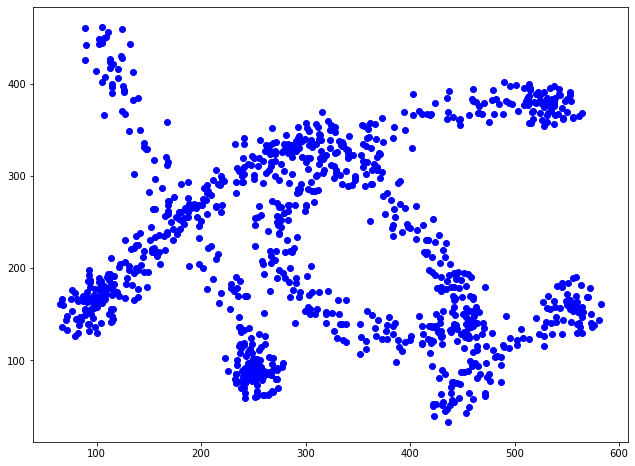

In [ ]:
# inversed art
fig = plt.figure(figsize=(width/60,height/60))

plt.scatter(points[:,0],points[:,1],c="blue")
plt.show()

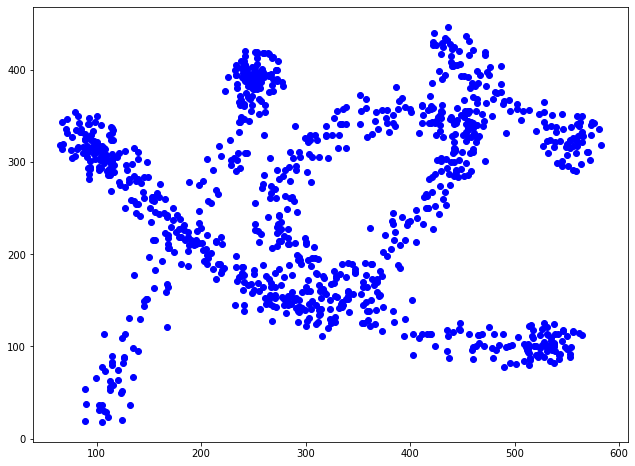

In [ ]:
# original art
points_matplot =  np.empty((0,2), dtype='int')

# перевод координат из pygame в matplotlib
for k in range(len(points)):
    new_array = np.ndarray((1,2),buffer = np.array(to_matplotlib(points[k],height)),dtype = int)
    points_matplot = np.append(points_matplot,new_array,axis=0)

fig = plt.figure(figsize=(width/60,height/60))
plt.scatter(points_matplot[:,0],points_matplot[:,1],c="blue")
plt.show()

1050
612


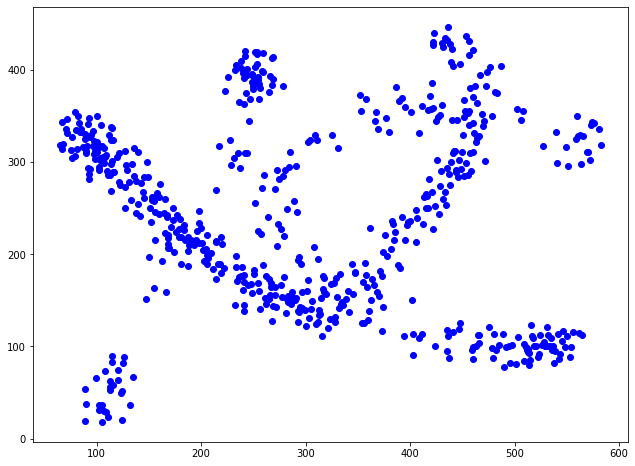

In [ ]:
# уникальные точки в points_matplot (есть недочеты)
points_matplot =  np.empty((0,2), dtype='int')

print(len(points))

# перевод координат из pygame в matplotlib
for k in range(0,len(points)):
    new_array = np.ndarray((1,2),buffer = np.array(to_matplotlib(points[k],height)),dtype = int)

    if ( (new_array[0][0] not in points_matplot[:,0]) or (new_array[0][1] not in points_matplot[:,1])):
        points_matplot = np.append(points_matplot,new_array,axis=0)

    
print(len(points_matplot))

fig = plt.figure(figsize=(width/60,height/60))
plt.scatter(points_matplot[:,0],points_matplot[:,1],c="blue")
plt.show()